<a href="https://colab.research.google.com/github/Taranshah9/Bank-Customer-Churn-Prediction/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ge-2024-results-csv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5361919%2F8916013%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240807%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240807T160722Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4142b810aa1af238c3b1a160f52ccdcd392605d3415ca7cd48346da370acf0e21c270a3c746d193faa67adf848508dc6e0d98d099c99c5d1021f3de392c74f540a29b8123d26f6ff731eda1d69f59dc5400713a0913b497e5e17dbe9e4cf266d90344f2a53bf0f299a23b52697531de0e085fc4e04fb71b6d60526c1988f2673386c1bd8b6c7ff45e3215b3097ecdd51ca2775f5638bdfe7f3b2154b7357530e3c3616d09c3337b58400a620dcb18f9de1edbc797ec58e9c94a3cd5bb066d761d7fce16de96f8d7d22ec595507aa92112e1a0edceb6fe8b591d291afa368e0e581756f39504ad6bb8fb8f83ee9529b9af7d5293bb18f99f8bed52a474d3c2c76'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Synapse Task 2

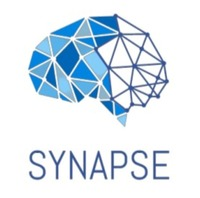

### Run the following cell to import the required libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Welcome to the second task on your road to being a part of the Synapse fam. This task will be focusing on the first step of beginning any ML or Data Science project which Data Preprocessing. One may ask why do we need to clean data? Imagine you are trying to make some food,you need to clean the vegetables, cut them, dice them, season them right? Any end product needs preprocessing and that is what we will be exploring in this task.

Now, use this link to download the dataset and upload it to your kaggle notebook on the input window on the right side.
https://drive.google.com/file/d/1d4Yq5AlqFkkNAsOeI2HO9jQ41EOp4qmJ/view?usp=sharing

Save it under the same name as the file name if the name doesn't match one in the code given below, change the path as '/kaggle/input/folder_name/file_name.csv'

We will be using this dataset to carry out basic pandas and matplotlib commands.


use this image as reference

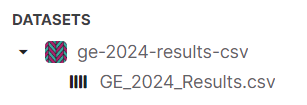

### To make your dataframe run this cell

In [ ]:
df = pd.read_csv('/kaggle/input/ge-2024-results-csv/GE_2024_Results.csv')
df

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...,...
8901,8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8903,8904,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost
8904,8901,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


This is a tabular dataset consisting of the results of Indian General Elections 2024. As you can see when you print the dataframe you can see its size at the bottom.

There is another way to find out the dimensions of a dataframe. Enter the code to find that out in the following cell.

In [ ]:
df.shape

(8906, 10)

Write the code to display the first 20 rows of the dataframe.

In [ ]:
df.head(20)

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
6,6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost
7,7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719.0,0.36,Lost
8,8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542.0,0.27,Lost
9,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JUSTIN TRUDEAU,Congress,NaN,NaN,NaN,NaN,Lost


You can see that we already have one column for indices and we dont need an extra to create consfusion. Write a code to remove the ID column.

In [ ]:
df = df.drop('ID',axis = 1)
df

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...
8901,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8903,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost
8904,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


You can see some NaN values in the dataframe, these are something that will cause errors later and we don't want that. Write a code to remove these values from our dataframe. Additionally you'll see that the index values are not in order. Take care of that as well :)

In [ ]:
df.dropna(inplace = True)
df

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
...,...,...,...,...,...,...,...,...,...
8900,West Bengal,Uluberia,SK. SAPIYAR ALI,Independent,2924,-,2924.0,0.21,Lost
8901,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8904,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


If all is correct your dataframe should have 8902 rows and 9 columns.

### The previous commands were just to make sure we have a workable dataframe now, we'll do some manipulations on the data.

Find out the top 5 most voted candidates in Telangana

In [ ]:
df.loc[df['State']=='Telangana'].sort_values(by = 'Total Votes',ascending = False).head()

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
7052,Telangana,Malkajgiri,EATALA RAJENDER,Bharatiya Janata Party,980712,10330,991042.0,51.25,Won
6856,Telangana,Chevella,KONDA VISHWESHWAR REDDY,Bharatiya Janata Party,798517,11365,809882.0,48.34,Won
7140,Telangana,Nalgonda,KUNDURU RAGHUVEER,Indian National Congress,772264,12073,784337.0,60.5,Won
6960,Telangana,Khammam,RAMASAHAYAM RAGHURAM REDDY,Indian National Congress,759603,7326,766929.0,61.29,Won
6900,Telangana,Hyderabad,ASADUDDIN OWAISI,All India Majlis-E-Ittehadul Muslimeen,659278,2703,661981.0,61.28,Won


Find out the total number of votes received by each state

In [ ]:
df.groupby('State')['Total Votes'].sum()

State
Andaman & Nicobar Islands                 202514.0
Andhra Pradesh                          33729342.0
Arunachal Pradesh                         723247.0
Assam                                   20059870.0
Bihar                                   43448949.0
Chandigarh                                449275.0
Chhattisgarh                            15061348.0
Dadra & Nagar Haveli and Daman & Diu      297998.0
Goa                                       906538.0
Gujarat                                 29115599.0
Haryana                                 13055572.0
Himachal Pradesh                         4069906.0
Jammu and Kashmir                        5151193.0
Jharkhand                               17241982.0
Karnataka                               38793617.0
Kerala                                  19980436.0
Ladakh                                    135524.0
Lakshadweep                                49200.0
Madhya Pradesh                          37940251.0
Maharashtra              

Show these values as a percentage of the total number of votes received in the election.

In [ ]:
df.groupby('State')['Total Votes'].sum()/df['Total Votes'].sum()*100

State
Andaman & Nicobar Islands                0.031380
Andhra Pradesh                           5.226410
Arunachal Pradesh                        0.112068
Assam                                    3.108306
Bihar                                    6.732478
Chandigarh                               0.069616
Chhattisgarh                             2.333778
Dadra & Nagar Haveli and Daman & Diu     0.046175
Goa                                      0.140469
Gujarat                                  4.511504
Haryana                                  2.022980
Himachal Pradesh                         0.630638
Jammu and Kashmir                        0.798185
Jharkhand                                2.671670
Karnataka                                6.011127
Kerala                                   3.095997
Ladakh                                   0.021000
Lakshadweep                              0.007624
Madhya Pradesh                           5.878897
Maharashtra                              8.8

Now, display the top 5 parties and find out the number of votes received by them

In [ ]:
df.groupby('Party')['Total Votes'].sum().sort_values(ascending = False).head()

Party
Bharatiya Janata Party          235973935.0
Indian National Congress        136759064.0
Samajwadi Party                  29549381.0
All India Trinamool Congress     28213393.0
Independent                      17844442.0
Name: Total Votes, dtype: float64

From the candidates who lost, list 10 candidates who got the highest percent votes.

In [ ]:
df['% of Votes'] = pd.to_numeric(df['% of Votes'], errors='coerce')
df.loc[df['Result']=='Lost'].sort_values(by = '% of Votes',ascending = False).head(10)

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
5646,Rajasthan,JAIPUR RURAL,ANIL CHOPRA,Indian National Congress,602293,13969,616262.0,48.83,Lost
5683,Rajasthan,JHUNJHUNU,SHUBHKARAN CHOUDHARY,Bharatiya Janata Party,523669,11264,534933.0,47.81,Lost
2723,Karnataka,Gulbarga,DR. UMESH G JADHAV,Bharatiya Janata Party,622615,2501,625116.0,47.70,Lost
1206,Chandigarh,Chandigarh,SANJAY TANDON,Bharatiya Janata Party,213770,383,214153.0,47.67,Lost
3824,Maharashtra,Dhule,BHAMRE SUBHASH RAMRAO,Bharatiya Janata Party,577778,2257,580035.0,47.57,Lost
2440,Karnataka,Bangalore central,MANSOOR ALI KHAN,Indian National Congress,625368,840,626208.0,47.57,Lost
7923,Uttar Pradesh,Kanpur,ALOK MISRA,Indian National Congress,419469,2618,422087.0,47.56,Lost
7555,Uttar Pradesh,Bareilly,PRAVEEN SINGH ARON,Samajwadi Party,530825,1498,532323.0,47.55,Lost
2754,Karnataka,Haveri,ANANDSWAMY GADDADEVARMATH,Indian National Congress,660191,1834,662025.0,47.43,Lost
4186,Maharashtra,Mumbai North West,AMOL GAJANAN KIRTIKAR,Shiv Sena (Uddhav Balasaheb Thackrey),451095,1501,452596.0,47.40,Lost


### These techniques help to understand the data that we have but we like something a bit more visual right? That's where matplotlib comes to our aid.

Make a piechart to show the votes recieved by the top 5 candidates in the elections.

<Axes: ylabel='Total Votes'>

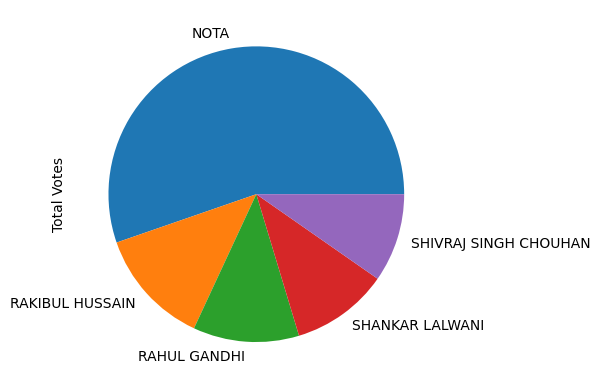

In [ ]:
df.groupby('Candidate')['Total Votes'].sum().sort_values(ascending = False).head().plot(kind = 'pie')

Make a bar graph to see the postal votes received by the parties in Karnataka

/tmp/ipykernel_33/3558722924.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=postal_votes_sum, x='Party', y='Postal Votes', ci=None)


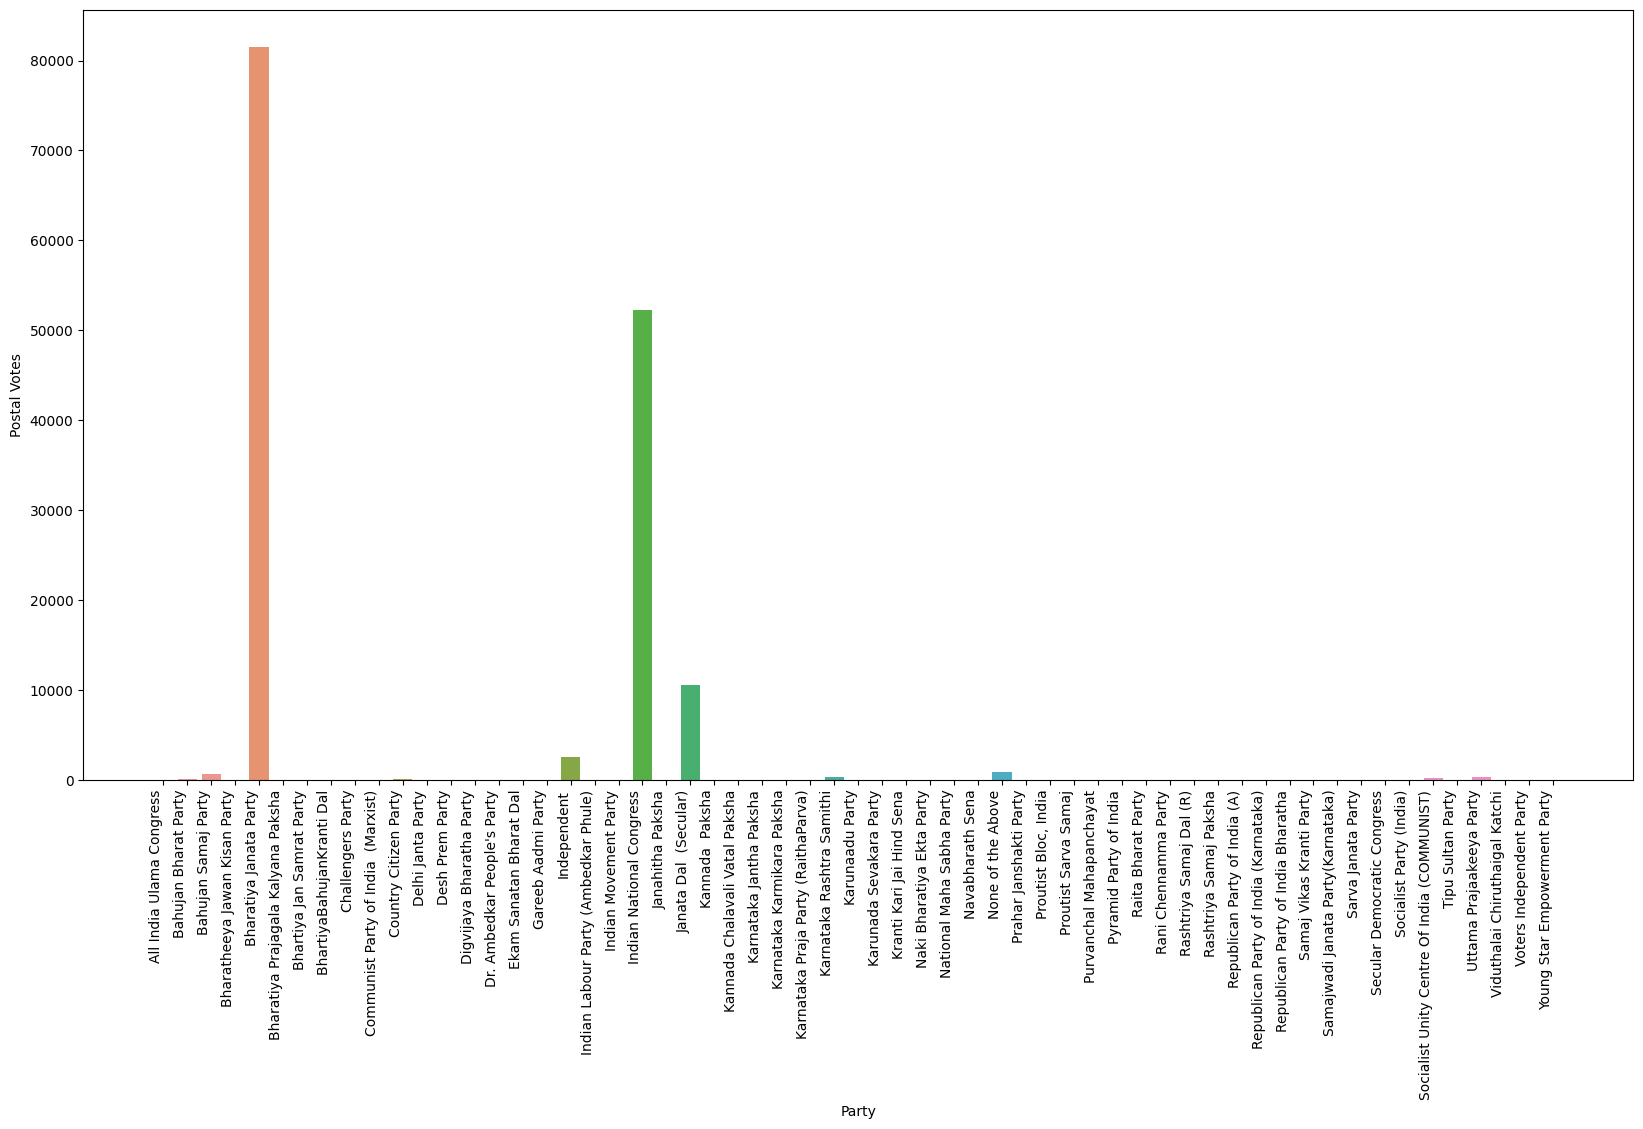

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
df2 = df.loc[df['State'] == 'Karnataka']
postal_votes_sum = df2.groupby('Party')['Postal Votes'].sum().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(data=postal_votes_sum, x='Party', y='Postal Votes', ci=None)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(postal_votes_sum['Party'], ha='right')
plt.gca().margins(x=0.05)
plt.show()


### Congratulations on making it to the end. EDA is a very vital toolkit to tackle Machine Learning problems. Hopefully this task helped you understand concepts of data analysis and visualisation. See you at the interviews :)

For any doubts contact:

Taran Shah: +91 9619223242

Divyam Jain: +91 96193 77044